# Simple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [167]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [169]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [170]:
y_pred = regressor.predict(X_test)

In [202]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9749154407708353

## Visualising the Training set results

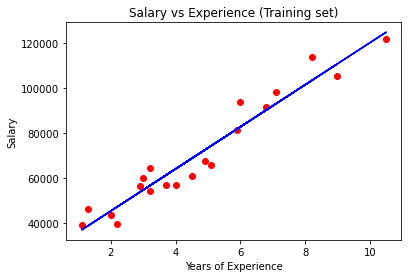

In [171]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

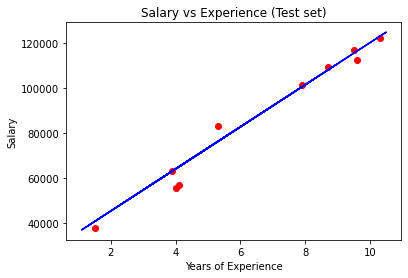

In [172]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
a=np.array([1,2])
sum(a),len(a)

(3, 2)

In [15]:
3.1*a

array([3.1, 6.2])

### practise

In [1]:
class LinearRegression1():
    def __init__(self):
        pass
    def fit(self, X,Y):
        self.M=0.0
        self.b=0.0
        avg_x=sum(X)/len(X)
        avg_y=sum(Y)/len(Y)
        numerator=0.0
        denominator=0.0
        for i in range(len(X)):
            numerator += (X[i]-avg_x)*(Y[i]-avg_y)
            denominator +=(X[i]-avg_x)**2
        self.M =numerator/denominator
        self.b=avg_y -self.M * avg_x  
    def intercept(self):
        return f"weight is:{self.M} and bias is:{self.b}"
    def predict(self,X):
        return self.M*X+self.b
    
    def loss(self,y_test, y_pridict):
        return sum([(y_test[i]-y_pridict[i])**2 for i in range(len(y_test))])
    def mae(self,y_test, y_pridict):
        return sum([abs(y_test[i]-y_pridict[i]) for i in range(len(y_test))])/len(y_test)
    def rmse(self,y_test, y_pridict):
        return math.sqrt(self.mae(y_test, y_pridict))
    def mse(self,y_test, y_pridict):
        return sum([(y_test[i]-y_pridict[i])**2 for i in range(len(y_test))])/len(y_test)
    def r2_score(self,y_test, y_pridict):
        numerator=0.0
        denominator=0.0
        y_test_avg=sum(y_test)/len(y_test)
        for i in range(len(y_test)):
            numerator += (y_test[i]-y_pridict[i])**2
            denominator += (y_test[i]-y_test_avg)**2
        return 1-(numerator/denominator)
    def adj_r2(self,y_test, y_pridict,features=1):
        return 1-((1-self.r2_score(y_test, y_pridict)*(len(y_test)-1))/len(y_test)-features-1)
        
class Ridge(LinearRegression1):
    def __init__(self,lambda_hyperparam=0.001):
        self.lambda_hyperparam=lambda_hyperparam
    def fit(self, X,Y):
        self.M=0.0
        self.b=0.0
        avg_x=sum(X)/len(X)
        avg_y=sum(Y)/len(Y)
        numerator=0.0
        denominator=0.0
        for i in range(len(X)):
            numerator += (X[i]-avg_x)*(Y[i]-avg_y)
            denominator +=(X[i]-avg_x)**2
        self.M =numerator/(denominator+self.lambda_hyperparam)
        self.b=avg_y -self.M * avg_x
class Lasso(LinearRegression1):
    def __init__(self,lambda_hyperparam=0.001):
        self.lambda_hyperparam=lambda_hyperparam
    def fit(self, X,Y):
        self.M=0.0
        self.b=0.0
        avg_x=sum(X)/len(X)
        avg_y=sum(Y)/len(Y)
        numerator=0.0
        denominator=0.0
        for i in range(len(X)):
            numerator += (X[i]-avg_x)*(Y[i]-avg_y)
            denominator +=(X[i]-avg_x)**2
        self.M =(numerator-self.lambda_hyperparam)/denominator
        self.b=avg_y -self.M * avg_x
        

In [3]:
from sklearn import datasets

In [5]:
X, y = datasets.make_regression(
        n_samples=1000, n_features=1, noise=20, random_state=4
    )
X[:5],y[:5]

(array([[-0.20735394],
        [ 0.18362632],
        [ 0.33825293],
        [ 0.28220666],
        [-1.3474603 ]]),
 array([-35.35180086,  -4.29822703,  32.80604793,  -9.54985362,
        -25.52375574]))

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [7]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

<IPython.core.display.Javascript object>

0.6931895037921929

In [8]:
regressor1 = LinearRegression1()
regressor1.fit(x_train, y_train)
y_pred = regressor1.predict(x_test)
regressor1.r2_score(y_test,y_pred)

array([0.6931895])

In [9]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
ridge.r2_score(y_test,y_pred)

array([0.69318948])

In [10]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
lasso.r2_score(y_test,y_pred)

array([0.6931895])

Text(0.5, 1.0, '(train set)')

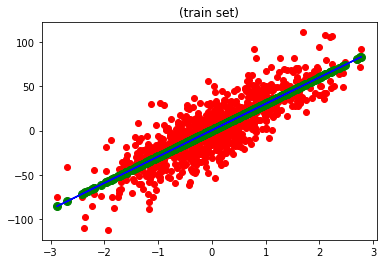

In [12]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train),"go",markersize=8)
plt.plot(x_train, regressor1.predict(x_train), color = 'blue')
plt.title('(train set)')

Text(0.5, 1.0, '(test set)')

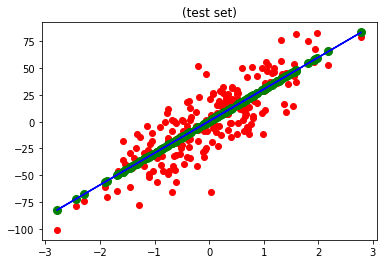

In [13]:
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test),"go",markersize=8)
plt.plot(x_test, regressor1.predict(x_test), color = 'blue')
plt.title('(test set)')

In [11]:
regressor1.intercept(),ridge.intercept(),lasso.intercept()

('weight is:[29.79440115] and bias is:[0.50154226]',
 'weight is:[29.79436024] and bias is:[0.50154456]',
 'weight is:[29.79439978] and bias is:[0.50154233]')

In [14]:
ridge = Ridge(lambda_hyperparam=1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
ridge.r2_score(y_test,y_pred)

array([0.69316705])

In [15]:
lasso = Lasso(lambda_hyperparam=1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
lasso.r2_score(y_test,y_pred)

array([0.69318879])

In [16]:
regressor1.intercept(),ridge.intercept(),lasso.intercept()

('weight is:[29.79440115] and bias is:[0.50154226]',
 'weight is:[29.75354368] and bias is:[0.50384319]',
 'weight is:[29.79302796] and bias is:[0.50161959]')

In [327]:
regressor1.loss(y_test,y_pred),ridge.loss(y_test,y_pred),lasso.loss(y_test,y_pred)

(array([5683.04865012]), array([5683.04865012]), array([5683.04865012]))

In [318]:
regressor1.mae(y_test,y_pred),regressor1.mse(y_test,y_pred),regressor1.rmse(y_test,y_pred),regressor1.adj_r2(y_test,y_pred,features=1)

(array([14.23619118]),
 array([285.19398515]),
 3.7730877508444154,
 array([3.85488575]))

Text(0.5, 1.0, '(train set)')

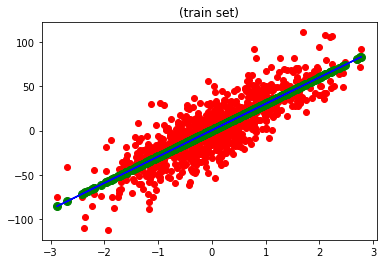

In [17]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train),"go",markersize=8)
plt.plot(x_train, regressor1.predict(x_train), color = 'blue')
plt.title('(train set)')

Text(0.5, 1.0, '(test set)')

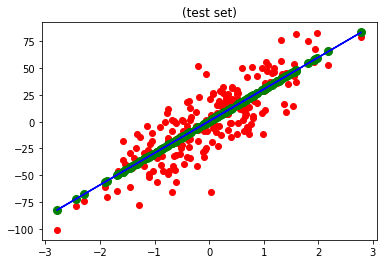

In [18]:
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test),"go",markersize=8)
plt.plot(x_test, regressor1.predict(x_test), color = 'blue')
plt.title('(test set)')

Text(0.5, 1.0, '(train set)')

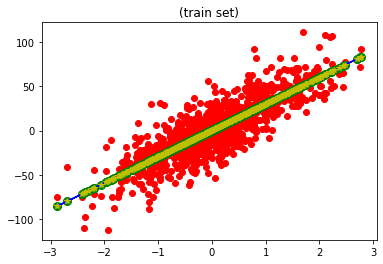

In [24]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train),"go",markersize=8)
plt.plot(x_train, regressor1.predict(x_train), color = 'blue')
plt.plot(x_train, ridge.predict(x_train),"y*")
plt.title('(train set)')

In [58]:
ridge = Ridge(lambda_hyperparam=-1000)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
ridge.r2_score(y_test,y_pred)

array([-8.56568517])

In [59]:
lasso = Lasso(lambda_hyperparam=1000)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
lasso.r2_score(y_test,y_pred)

array([0.69103394])

Text(0.5, 1.0, '(train set)')

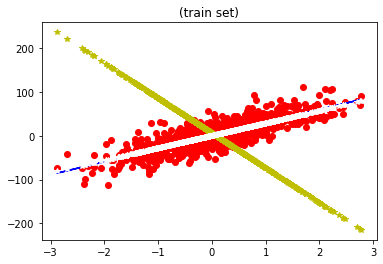

In [60]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train, regressor1.predict(x_train), color = 'blue')
plt.plot(x_train, ridge.predict(x_train),"y*")
plt.plot(x_train, lasso.predict(x_train),"w*")
plt.title('(train set)')